* Beginning.
Before throwing sh*t at the wall, I should explore the data in order to see what I'm running PCA and t-SNE on.

In [1]:
import pandas as pd

db = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_2/mnist_train.csv')

print(db.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

Looking at the data, I see that there are pixels filled in with small integers (which, correspond to/as the rows). Also, the use of pixels suggest the data is representable as images.

After looking at it a bit, it's now time to standardize the data, which here would be the act of transforming the data (and the data only) into a scaler. I'll being by first taking out of the pixel data only by dropping the 'label' feature, and then transform the pixel data into a scaler.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

db = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_2/mnist_train.csv')

d = db.drop('label', axis=1)
data = d.head(15000)

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


** With the features seen & understood as to what they are and the data points transformed, PCA can now be considered.
What is PCA again? PCA, or Princple Componet Analysis, is a dimensionality reduction method in which correlated features are +extroplated into a new data set which contains the essintal parts, or componests, which makes them correleated with each other+. I don't think the ending is the correct understanding; it seems the transformation is linear, where the transformation does reduce the dimensionality down but presents this new dimensionlaity of the data points in a way so as to show which ones are linearly uncorrelated by having the new axes, or componets, chosen so as to capture the variance between the data points while being uncorrelated..

In [3]:
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

db = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_2/mnist_train.csv')

d = db.drop('label', axis=1)
data = d.head(15000)
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print("Shape of pca_reduced.shape =", pca_data.shape)

Shape of pca_reduced.shape = (15000, 2)


I can see that the shape of the transformed sample_data via pca represents the selected amount of standarized rows into a two-dimensional plane where the axis or componets are of two linearly uncorrelated features capturing the most variance.

*** With the standarized data of the pixels reduced in their dimensionality, I would want to visually see the results.
To do this I have to create an object for the pca_data, done by using np.vstack in order +to preform matrix multiplication+: the use of np.vstak isn't technically matrix multiplication, but it is a process of transposing like it; what's going on is that I'm adding the labels back to the standarized data after it's dimensionality is reduced, that way I have labels for the visualization (really it's transpose->pca.data, np.vstack()->labels as row, .T->back to original orention with labels as new column). After this, I can then create a dataframe which is acted on by the .map method via the matlibplot package.

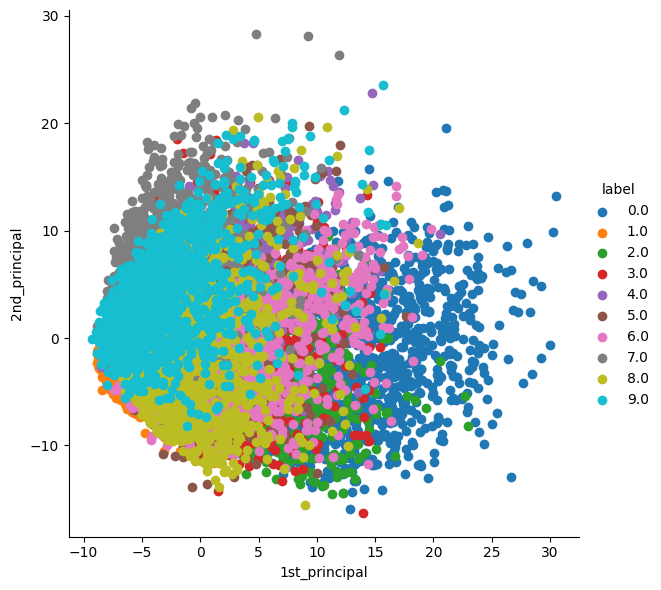

In [4]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

db = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_2/mnist_train.csv')

l = db['label']
d = db.drop('label', axis=1)
labels = l.head(15000)
data = d.head(15000)
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()

plt.savefig('pca.png')

Looking the output over, I notice a few things.
- It's really hard to read, so much so that I think most wouldn't have a clue looking a this smodgeboard.
- 3, or the color red, is very hard to notice in this type of analysis & it's graph. This seems due to it have a simmiler variance in both components as 8, 9, and 6: maybe the shape of them?

** With PCA method analysis done, I can now explore the data set with t-SNE.
This machine learning model will still use the standarized_data I had created eariler, but I will create it's own small set so as to process only the top 1000 points. I'll also plot the results in order to visually see the output of the model.

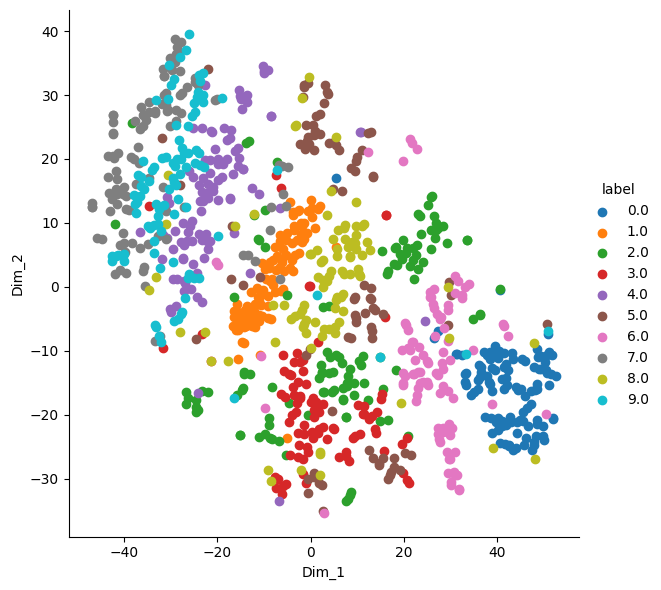

In [5]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

db = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_2/mnist_train.csv')

l = db['label']
d = db.drop('label', axis=1)
labels = l.head(15000)
data = d.head(15000)
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data

data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.savefig('stsne.png')

Looking it over, I see,
- Now I can actually see each data point in some place of isolation.
- I can now see how specific points or drawn values are clustered together due to probabilistic neighbor clusters, indicating they have some sort of similarity.

**** I might be good idea to play around with some of the t-TSNE's model hyperparameters
Before I do, what do these hyperparameters mean?
- Perplexity relates to the number of neighbors each point in the dataset is expected to have. A high Perplexity means a each point is considered it's neighborhood to a larger range, while a lower restricts it to what's local around it; the former is for macro-relations and the latter for micro-relations between the data points.
- Learning Rate reconciles it's adjustment of the model's parameter with the estimated error rate that's gained each time the model is updated. So what's the error rate? It's basically how often a model, or anyother system, fails in it's task; so here it's used to measure the type of effect that changing the model's parameters has on it. Increasing it results in faster convergence of the goal, but could lead to overshoot errors; as well, dropping it too low leads to slower convergence but might lead to a precise minimum error.
- Maximum number of iterations sounds just like what it means: it's the maximum number of times that a iteration, or steps, that the model will take on the set of data. Too little might mean a lack of generalization & model performance, while too many might just be a loss of time & computation.

  So now let's play with them a bit. I notice before in the first run that some points having the same labels were still far apart form each other, so maybe I should increase the Perplexity hyperparameter.

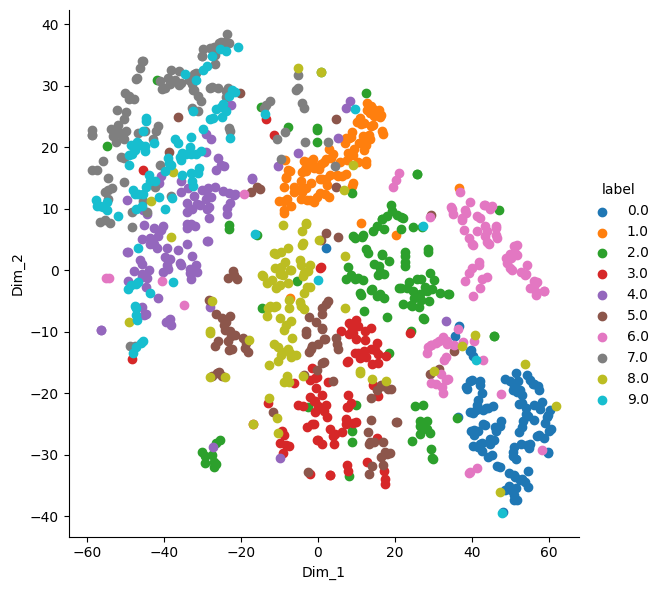

In [6]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

db = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_2/mnist_train.csv')

l = db['label']
d = db.drop('label', axis=1)
labels = l.head(15000)
data = d.head(15000)
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data

data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity=20)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.savefig('stsne_p.png')

I think that made it worse, maybe I should try lowering it.

In [ ]:
#+begin_src python :results file
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

db = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_2/mnist_train.csv')

l = db['label']
d = db.drop('label', axis=1)
labels = l.head(15000)
data = d.head(15000)
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data

data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity=20)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.savefig('stsne_p.png')

That has made the clusters a bit tighter, or having greater accuracy, but it still could use more of something. Maybe I could simply let the model have a greater amount of iterations in order to have more time to learn.
***** Keeping the decreased Perplexity but increasing the iterations.

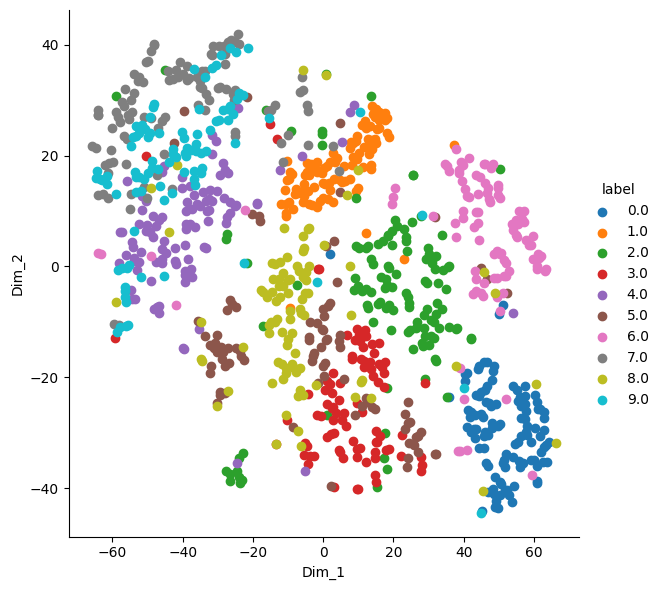

In [10]:
 #+begin_src python :results file
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

db = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_2/mnist_train.csv')

l = db['label']
d = db.drop('label', axis=1)
labels = l.head(15000)
data = d.head(15000)
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data

data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0, perplexity=20, max_iter=2000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()

plt.savefig('stsne_i.png')

Not much has changed after inceasing the iteration by the increase from the default of 1000 to 2000. It might be the case I'm missing something or a understanding to figure the kind of single or mix of hyperparamemter change is needed to get greater accuracy.

* Comparing Results.
At least with my test so far, I feel that the biggest difference between PCA and t-SNE is use for visualization. PCA might be good for linear data where it's desired to reduce the dimensionality down for futher use, but it's graph doesn't help that much in figuring out by sight which points are closer to each other due to how much they can overlap.

On the other hand, t-SNE is more adapt for the kind of visualization which is desired for looking into the similarities between points, provding not a scale but rather a cluster of likeness. Though, it has a greater amount of hyperparameters which means a longer time to find what model configuration fits the data.

* Reflection.
From both visualizations I'd notice that, though the method of plotting the points are different, both use the same componets which had lead to both graphs having a similar direction for each point type. Thinking on it a bit more, it seems that a high degree of the most variance between the points include those points which represent values of 5->9, while the second most variance in the dataset includes values of 0->4, with 3 a kind of outlier.

In my test case, I found hyperparameter tuning didn't result in much difference at all, maybe just a sightly better accuracy.

From what I've done so far, I think dimensionality reduction is important in ML for just being able to futher explore the kind of data I'm dealing with. When I begun, I didn't understanding what I was dealing with and didn't know how it was going to even look when graph, but graphing it lead me to see how the data within the sample_set are related to each other and thus the kind of feature of the data I might be dealing with. I really do see these kind of models being a first step when exploring.
